A case study using iris dataset for KNN algorithm.

In [13]:
# import modules for this project
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# load iris dataset
iris = datasets.load_iris()
data, labels = iris.data, iris.target

# training testing split
res = train_test_split(data, labels,
                       train_size=0.8,
                       test_size=0.2,
                       random_state=12)
train_data, test_data, train_labels, test_labels = res

# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
# classifier "out of the box", no parameters
knn = KNeighborsClassifier()
knn.fit(train_data, train_labels)

# print some interested metrics
print("Predictions from the classifier:")
learn_data_predicted = knn.predict(train_data)
print(learn_data_predicted)
print("Target values:")
print(train_labels)
print(accuracy_score(learn_data_predicted, train_labels))

# re-do KNN using some specific parameters.
knn2 = KNeighborsClassifier(algorithm='auto',
                            leaf_size=30,
                            metric='minkowski',
                            p=2,         # p=2 is equivalent to euclidian distance
                            metric_params=None,
                            n_jobs=1,
                            n_neighbors=5,
                            weights='uniform')

knn.fit(train_data, train_labels)
test_data_predicted = knn.predict(test_data)
accuracy_score(test_data_predicted, test_labels)

Predictions from the classifier:
[0 1 2 0 2 0 1 1 0 1 1 0 0 0 0 0 0 0 2 0 2 1 1 1 0 2 1 1 2 0 2 0 2 1 2 2 1
 1 1 2 2 0 2 2 0 1 0 2 2 0 1 1 0 0 1 1 1 1 2 1 2 0 0 1 1 2 0 2 1 0 2 2 1 2
 2 0 0 2 1 1 2 0 1 1 0 1 1 2 2 1 0 2 0 2 0 0 1 2 2 1 2 2 0 1 1 0 2 2 2 1 2
 2 2 0 0 1 0 2 2 1]
Target values:
[0 1 2 0 2 0 1 1 0 1 1 0 0 0 0 0 0 0 2 0 2 1 1 1 0 2 1 1 2 0 2 0 2 2 2 2 1
 1 1 1 2 0 2 2 0 1 0 2 2 0 1 1 0 0 1 1 1 1 2 1 2 0 0 1 1 1 0 2 1 0 2 2 1 2
 2 0 0 2 1 1 2 0 1 1 0 1 1 2 2 1 0 2 0 2 0 0 1 2 2 1 2 2 0 1 1 0 2 2 2 1 2
 2 2 0 0 1 0 2 2 1]
0.975


0.9666666666666667

Use this command to help with choice of paramters in the KNeighborsClassifier function.

In [14]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |
 |  Classifier implementing the k-nearest neighbors vote.
 |
 |  Read more in the :ref:`User Guide <classification>`.
 |
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |
 |  weights : {'uniform', 'distance'}, callable or None, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighbors of a q

Generation of an artificial data-set. (This code uses make_blobs to generate 150 synthetic data points around three cluster centers, assigns class labels, and prepares them for visualization, clustering analysis, or machine learning experiments.)

In [15]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

centers = [[2, 4], [6, 6], [1, 9]]
n_classes = len(centers)
data, labels = make_blobs(n_samples=150,
                          centers=np.array(centers),
                          random_state=1)

Splitting of the generated data into 80-20 for trainning and Testing.

In [16]:
from sklearn.model_selection import train_test_split

# do a 80-20 split of the data
new_simulated_train_data, new_simlated_test_data, new_simulated_train_labels, new_simulated_test_labels = train_test_split(data, labels,
                                                                                                              train_size=0.8,
                                                                                                              test_size=0.2,
                                                                                                              random_state=12)

Performing the KNN analysis for thr aritifvially simulated data and getting the accuracy score of the output.

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# KNN analysis of the new simulated data
knn_simulated = KNeighborsClassifier()
knn_simulated.fit(new_simulated_train_data, new_simulated_train_labels)

# output accuracy score
test_data_predicted_simulated = knn_simulated.predict(new_simlated_test_data)
accuracy_simulated = accuracy_score(test_data_predicted_simulated, new_simulated_test_labels)

print(f"Accuracy of KNN on simulated data: {accuracy_simulated}")

Accuracy of KNN on simulated data: 1.0


Generating the confusion matrix plot:

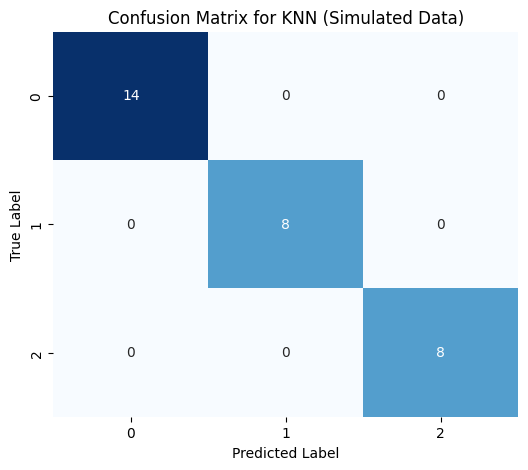

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# predicting the tested data
test_data_predicted_simulated = knn_simulated.predict(new_simlated_test_data)

#  creating the confusion matrix
cm = confusion_matrix(new_simulated_test_labels, test_data_predicted_simulated)

# ploting  confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(new_simulated_test_labels),
            yticklabels=np.unique(new_simulated_test_labels))

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for KNN (Simulated Data)")
plt.show()

Plotting the different Results.

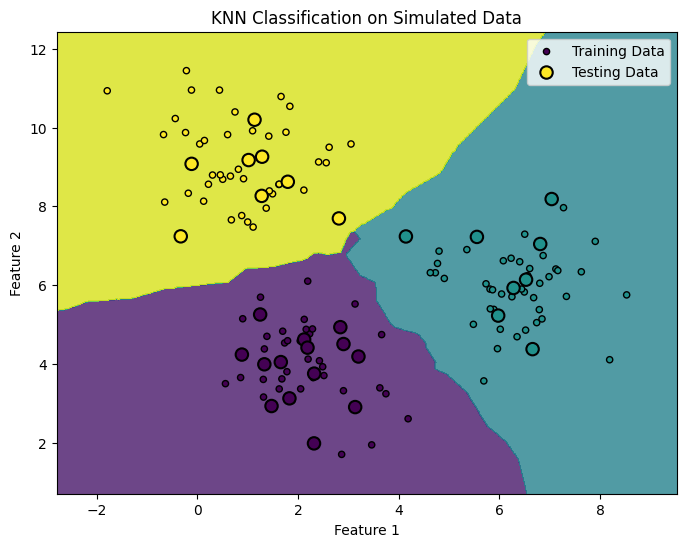

In [19]:
# plot your different results
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn_simulated.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8)

# Plot also the training points
plt.scatter(new_simulated_train_data[:, 0], new_simulated_train_data[:, 1], c=new_simulated_train_labels, edgecolors='k', s=20, label='Training Data')
# Plot also the testing points
plt.scatter(new_simlated_test_data[:, 0], new_simlated_test_data[:, 1], c=new_simulated_test_labels, edgecolors='k', s=80, linewidth=1.5, label='Testing Data')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Classification on Simulated Data')
plt.legend()
plt.show()

The training data (small circles) and testing data (larger circles) are plotted within the colored regions. The model's accuracy is visually represented by how well the training and testing data are grouped within their respective colored regions.